# Loan Repayment Prediction

In [14]:
#Importing Libraries
import os
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression

In [15]:
#Load the Data & statistical analysis
def load_data():
    current_path = os.getcwd()
    data_path = os.path.join(current_path, "assets", "loan.csv")
    train=pd.read_csv(data_path)
    print(train.shape)
    print(train.info())
    print(train.describe().T)
    return train

In [18]:
def feature_engg(train):
    #Filling Missing Values
    print(train.isnull().sum())
    #Employee Length:Fill na values with mean
    train['emp_length'].fillna(train['emp_length'].mean(skipna=True),inplace=True)
    
    #Annual Income:mean income
    train['annual_inc'].fillna(train['annual_inc'].median(),inplace=True)
    
    #delinq_2 yrs
    train['delinq_2yrs'].fillna(train['delinq_2yrs'].mean(skipna=True),inplace=True)
    
    #revol_util
    train['revol_util'].fillna(train['revol_util'].median(),inplace=True)
    
    #revol_util
    train['total_acc'].fillna(train['total_acc'].median(),inplace=True)
    
    #longest_credit_length
    train['longest_credit_length'].fillna(train['longest_credit_length'].median(),inplace=True)
    print(train.isnull().sum())
    
    #Categorical Features
    cat_features=train.select_dtypes(include='object').columns
    print("Categorical Features:\n",cat_features,"\n No of categorical features:",len(cat_features))
    #Converting Categorical-Numeric features using Label Encoding
    le=LabelEncoder()
    for feature in cat_features:
        train[feature]=le.fit_transform(train[feature])
    
    #Apply log transformation to deal with skewness of annual income
    train['annual_inc']=np.log(train['annual_inc'])
    return train

# Model Building

In [19]:
def construct_model(train):
    # Split into train and test data
    x=train.drop('bad_loan',axis=1)
    y=train.bad_loan
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
        
    #Feature Scaling
    rs=RobustScaler()
    x_train=rs.fit_transform(x_train)
    x_test=rs.transform(x_test)
    
    model=LogisticRegression(solver='liblinear')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("Accuracy:",accuracy_score(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Classification Report:\n",classification_report(y_test,y_pred))

    #Cross Validation
    sc=RobustScaler()
    x=sc.fit_transform(x)
    cv_score=cross_val_score(model,x,y,cv=10)
    print("Accuracy with Cross Validation:",np.mean(cv_score))
    return model

In [20]:
df=load_data()
df.head()

(163987, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163958 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified


In [21]:
df=load_data()
df=feature_engg(df)

(163987, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163958 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    

In [23]:
#To check feature importances
x=df.drop('bad_loan',axis=1)
y=df['bad_loan']
model=ExtraTreesRegressor()
model.fit(x,y)
model.feature_importances_

array([0.09146401, 0.0150654 , 0.12262887, 0.07442132, 0.02621803,
       0.09965677, 0.05878567, 0.08481268, 0.09662387, 0.03413254,
       0.0936969 , 0.08934828, 0.08996321, 0.02318244])

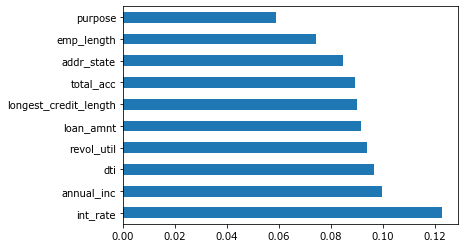

In [24]:
df_feat=pd.Series(model.feature_importances_,index=x.columns)
df_feat.nlargest(10).plot(kind='barh')

In [25]:
lr=construct_model(df)

(131189, 14) (131189,) (32798, 14) (32798,)
Accuracy: 0.8160253674004513
Confusion Matrix:
 [[26555   274]
 [ 5760   209]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     26829
           1       0.43      0.04      0.06      5969

    accuracy                           0.82     32798
   macro avg       0.63      0.51      0.48     32798
weighted avg       0.75      0.82      0.75     32798

Accuracy with Cross Validation: 0.816369572613896


In [30]:
import pickle
current_path = os.getcwd()
file_path=os.path.join(current_path,'assets','loan_predict.pkl')
file=open(file_path,"wb")
pickle.dump(lr,file)

In [31]:
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,0,10.65,10.0,5,10.085809,1,3,27.65,0.0,83.7,9.0,0,26.0,1
1,2500,1,15.27,0.0,5,10.308953,0,10,1.00,0.0,9.4,4.0,1,12.0,1
2,2400,0,15.96,10.0,5,9.413444,11,14,8.72,0.0,98.5,10.0,0,10.0,0
3,10000,0,13.49,10.0,5,10.803649,9,4,20.00,0.0,21.0,37.0,0,15.0,1
4,5000,0,7.90,3.0,5,10.491274,13,3,11.20,0.0,28.3,12.0,0,7.0,1
